# Projeto 6: Classificação multiclasse iris

## Etapa 1: Importação das bibliotecas

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import torch
from torch import nn, optim
import torch.nn.functional as F 
from sklearn.metrics import confusion_matrix

torch.manual_seed(42)
np.random.seed(42)

## Etapa 2: Base de dados

In [3]:
base = pd.read_csv('./Bases/Bases/iris.csv')

In [4]:
base.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


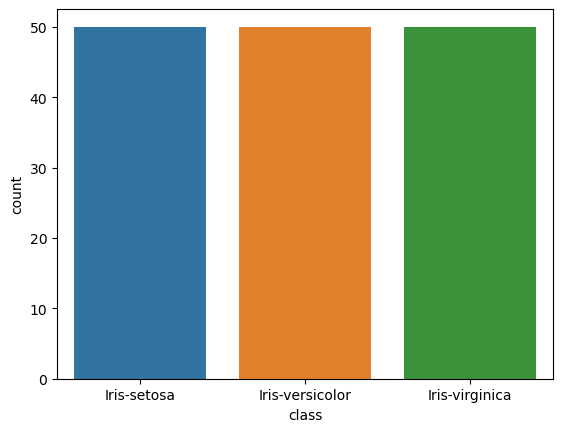

In [6]:
sns.countplot(x=base['class'], hue=base['class']);

In [7]:
previsores = base.iloc[:, 0:4].values
classe = base.iloc[:, 4].values

In [8]:
previsores.shape, classe.shape

((150, 4), (150,))

In [9]:
np.unique(base['class'], return_counts=True)

(array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object),
 array([50, 50, 50], dtype=int64))

In [10]:
encoder = LabelEncoder()
classe = encoder.fit_transform(classe)

In [11]:
np.unique(classe, return_counts=True)

(array([0, 1, 2]), array([50, 50, 50], dtype=int64))

In [12]:
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, classe, test_size=0.25, random_state=42)

In [13]:
previsores_treinamento.shape, previsores_teste.shape, classe_treinamento.shape, classe_teste.shape

((112, 4), (38, 4), (112,), (38,))

In [14]:
previsores_treinamento = torch.tensor(previsores_treinamento, dtype=torch.float)
classe_treinamento = torch.tensor(classe_treinamento, dtype=torch.long)

## Etapa 3: Construção do modelo

In [15]:
classificador = nn.Sequential(
    nn.Linear(4, 4),
    nn.ReLU(),
    nn.Linear(4, 4),
    nn.ReLU(),
    nn.Linear(4, 3)
)

In [16]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(classificador.parameters(), lr=0.001, weight_decay=0.0001)

In [18]:
dataset_train = torch.utils.data.TensorDataset(previsores_treinamento, classe_treinamento)
train_loader = torch.utils.data.DataLoader(dataset_train, batch_size=10, shuffle=True)

## Etapa 4: Treinamento do modelo

In [21]:
def train(model, train_loader, epochs, criterion, optimizer):
    
    for epoch in range(epochs):
        running_loss = 0.
        running_accuracy = 0.

        for data in train_loader:
            inputs, labels = data
            
            optimizer.zero_grad()
            
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            
            outputs = F.softmax(outputs)
            top_p, top_class = outputs.topk(k = 1, dim = 1) # buscando probabilidade por valor máximo das colunas
            equals = top_class == labels.view(*top_class.shape)
            running_accuracy += torch.mean(equals.type(torch.FloatTensor))
            
            optimizer.step()

            running_loss += loss.item()
        
        print(f'Epoch {epoch+1}/{epochs}: Loss {running_loss/len(train_loader)} Accuracy {running_accuracy/len(train_loader)}')

In [23]:
train(classificador, train_loader, 2000, criterion, optimizer)

C:\Users\vcell\AppData\Local\Temp\ipykernel_20700\1848374138.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  outputs = F.softmax(outputs)


Epoch 1/2000: Loss 0.3633984485641122 Accuracy 0.9583333134651184
Epoch 2/2000: Loss 0.361708124478658 Accuracy 0.9416666030883789
Epoch 3/2000: Loss 0.40178292120496434 Accuracy 0.9583333134651184
Epoch 4/2000: Loss 0.3994317054748535 Accuracy 0.9333333969116211
Epoch 5/2000: Loss 0.3804175903399785 Accuracy 0.9583333134651184
Epoch 6/2000: Loss 0.3549681094785531 Accuracy 0.9666666388511658
Epoch 7/2000: Loss 0.36869705965121585 Accuracy 0.9166666865348816
Epoch 8/2000: Loss 0.3596695140004158 Accuracy 0.9666666984558105
Epoch 9/2000: Loss 0.3748062700033188 Accuracy 0.958333432674408
Epoch 10/2000: Loss 0.35201164583365124 Accuracy 0.9583333134651184
Epoch 11/2000: Loss 0.35958053916692734 Accuracy 0.9583333134651184
Epoch 12/2000: Loss 0.36559922496477765 Accuracy 0.9666666388511658
Epoch 13/2000: Loss 0.34520965193708736 Accuracy 0.9583333134651184
Epoch 14/2000: Loss 0.33026042580604553 Accuracy 0.949999988079071
Epoch 15/2000: Loss 0.3352299928665161 Accuracy 0.9583332538604736


## Etapa 5: Avaliação do modelo

In [24]:
classificador.eval()

Sequential(
  (0): Linear(in_features=4, out_features=4, bias=True)
  (1): ReLU()
  (2): Linear(in_features=4, out_features=4, bias=True)
  (3): ReLU()
  (4): Linear(in_features=4, out_features=3, bias=True)
)

In [25]:
previsores_teste = torch.tensor(previsores_teste, dtype=torch.float)
classe_teste = torch.tensor(classe_teste, dtype=torch.long)

In [ ]:
previsoes = classificador(previsores_teste)

In [27]:
F.softmax(previsoes)

C:\Users\vcell\AppData\Local\Temp\ipykernel_20700\958762012.py:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  F.softmax(previsoes)


tensor([[3.6741e-05, 9.9814e-01, 1.8265e-03],
        [9.9999e-01, 1.4943e-05, 1.1719e-17],
        [1.5970e-08, 2.8297e-04, 9.9972e-01],
        [5.7979e-05, 9.8879e-01, 1.1151e-02],
        [2.4436e-05, 9.9522e-01, 4.7582e-03],
        [9.9997e-01, 3.4233e-05, 1.5881e-16],
        [5.8246e-05, 9.9993e-01, 1.1099e-05],
        [9.7446e-07, 5.4841e-03, 9.9451e-01],
        [9.5626e-05, 5.8352e-01, 4.1638e-01],
        [2.4700e-05, 9.9994e-01, 3.3742e-05],
        [1.2998e-05, 1.0496e-01, 8.9503e-01],
        [9.9991e-01, 8.6018e-05, 1.6493e-15],
        [9.9998e-01, 1.7699e-05, 2.4114e-17],
        [9.9993e-01, 7.3356e-05, 9.4729e-16],
        [9.9998e-01, 2.3608e-05, 7.4085e-17],
        [2.9322e-05, 9.9598e-01, 3.9924e-03],
        [1.8973e-07, 7.6673e-04, 9.9923e-01],
        [3.7617e-05, 9.9989e-01, 7.2779e-05],
        [6.6173e-05, 9.9490e-01, 5.0303e-03],
        [2.4527e-07, 8.4843e-04, 9.9915e-01],
        [9.9990e-01, 9.5673e-05, 2.4267e-15],
        [4.3095e-05, 2.8399e-01, 7

In [28]:
previsoes  = [np.argmax(t) for t in previsoes.detach().numpy()]

In [29]:
previsoes

[1,
 0,
 2,
 1,
 1,
 0,
 1,
 2,
 1,
 1,
 2,
 0,
 0,
 0,
 0,
 1,
 2,
 1,
 1,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 2,
 1,
 0]

In [30]:
matriz = confusion_matrix(classe_teste, previsoes)
matriz

array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)

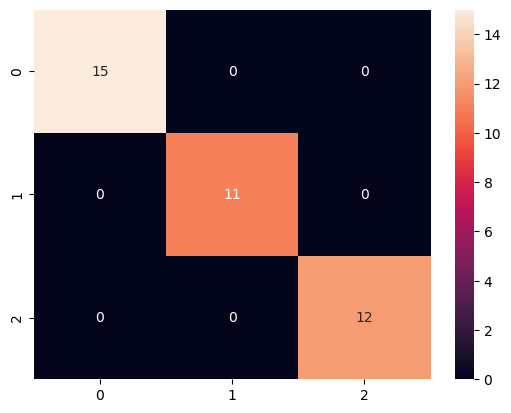

In [31]:
sns.heatmap(matriz, annot=True);

# Projeto 7: Classificação multiclasse iris com validação cruzada

## Etapa 1: Importação das bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import torch.nn as nn
from skorch import NeuralNetClassifier
import torch
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

torch.manual_seed(42)
np.random.seed(42)

## Etapa 2: Base de dados

In [33]:
base = pd.read_csv('./Bases/Bases/iris.csv')
previsoes = base.iloc[:, 0:4].values
classe = base.iloc[:, 4].values

In [34]:
encoder = LabelEncoder()
classe = encoder.fit_transform(classe)

In [35]:
previsores = previsores.astype(np.float32)
classe = classe.astype(np.int64)

## Etapa 3: Construção do modelo

In [36]:
class classificador_torch(nn.Module):
    
    def __init__(self):
        super().__init__()

        self.dense0 = nn.Linear(4, 16)
        self.activation0 = nn.ReLU()

        self.dense1 = nn.Linear(16, 16)
        self.activation1 = nn.ReLU()

        self.dense2 = nn.Linear(16, 3)
    
    def forward(self, X):
        X = self.dense0(X)
        X = self.activation0(X)

        X = self.dense1(X)
        X = self.activation1(X)

        X = self.dense2(X)

        return X

In [37]:
classificador_sklearn = NeuralNetClassifier(module=classificador_torch, 
                                            criterion=nn.CrossEntropyLoss, 
                                            optimizer=torch.optim.Adam, 
                                            max_epochs=1000, 
                                            batch_size=10, 
                                            train_split=False)

## Etapa 4: Validação cruzada

In [38]:
resultados = cross_val_score(classificador_sklearn, previsores, classe, cv = 5, scoring = 'accuracy')

  epoch    train_loss     dur
-------  ------------  ------
      1        1.4599  0.0292
      2        1.0332  0.0544
      3        0.9900  0.0307
      4        0.8451  0.0405
      5        0.7587  0.0308
      6        0.7645  0.0348
      7        0.6520  0.0320
      8        0.5923  0.0307
      9        0.5551  0.0385
     10        0.5270  0.0097
     11        0.5061  0.0334
     12        0.4915  0.0155
     13        0.4779  0.0265
     14        0.4667  0.0317
     15        0.4569  0.0202
     16        0.4476  0.0154
     17        0.4362  0.0248
     18        0.4257  0.0188
     19        0.4209  0.0384
     20        0.4024  0.0189
     21        0.4099  0.0384
     22        0.3750  0.0169
     23        0.4020  0.0306
     24        0.3471  0.0221
     25        0.3837  0.0316
     26        0.3187  0.0226
     27        0.3523  0.0364
     28        0.3044  0.0203
     29        0.3094  0.0331
     30        0.3015  0.0507
     31        0.2696  0.0448
     32   

In [39]:
media = resultados.mean()
desvio = resultados.std()

In [40]:
media, desvio

(0.9666666666666666, 0.04216370213557838)